<br>

<br>

# Heart Disease EDA  - Prediction


<br>

Hello everyone !

In this notebook, we are going to do an exploratory data analysis.

Let's start with importing the libraries we might need.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

I'm just going to add a little spice :)

In [105]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


In [106]:
df = pd.read_csv('heart.csv')

In [107]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0


### DATASET COLUMNS FEATURE EXPLAIN
<br>

If you have a problem with understanding medical terms here is the explanation for the column names! 
<br><br>
- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl) - (needs to be less than 200 mg/dL)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) - (A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.

- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no)) - (Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.)
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (Value 0: < 50% diameter narrowing - Value 1: > 50% diameter narrowing)


In [5]:
print("You're welcome! Since I used to be a nurse it my plesure!!",("\U0001F60E"))

You're welcome! Since I used to be a nurse it my plesure!! 😎


Just in case I always work with copy of my dataset :)

In [108]:
df1 = df.copy()

In [109]:
df1.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<br>

_To explore the data, df.describe is pretty useful but a little basic for serious exploratory data analysis. Now, I am going to install pandas-profiling and you are going to be amazed!! It is amazing and extremely useful!!!_
 <br><br>

In [10]:
!pip install pandas-profiling

In [11]:
df1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<br><br>
__Don't you think this is crazy ?!! I love it!__<br><br>

As we can see we don't have any null values in out dataset which is great!<br><br>
Another thing is all the columns we have are either int or float so we don't have to spend so much time on data pre-processing.<br><br>
But!! I see that we have 1 duplicate value which we are going to drop to increase power of analysis!<br><br>

## Data Pre-processing

Let's start with dropping the duplicate value.

In [110]:
df1.duplicated().sum()

1

In [188]:
df1.drop_duplicates(inplace=True)

In [189]:
df1.duplicated().sum()

0

We are good to go!

In [113]:
for col in df1:
    print(col)
    print(df[col].value_counts(),"\n")
    print("************************" ,'\n\n')

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64 

************************ 


sex
1    206
0     96
Name: sex, dtype: int64 

************************ 


cp
0    143
2     86
1     50
3     23
Name: cp, dtype: int64 

************************ 


trestbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165   

In [139]:
df1['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [142]:
# Drop 0's as they mean null
df1.drop(df1[df1['thal']==0].index, inplace=True)

In [143]:
df1['thal'].value_counts()

2    166
3    117
1     18
Name: thal, dtype: int64

## Analyzing the Data

In [144]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [145]:
df1.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


Let's see the corralation between columns by using heatmap.

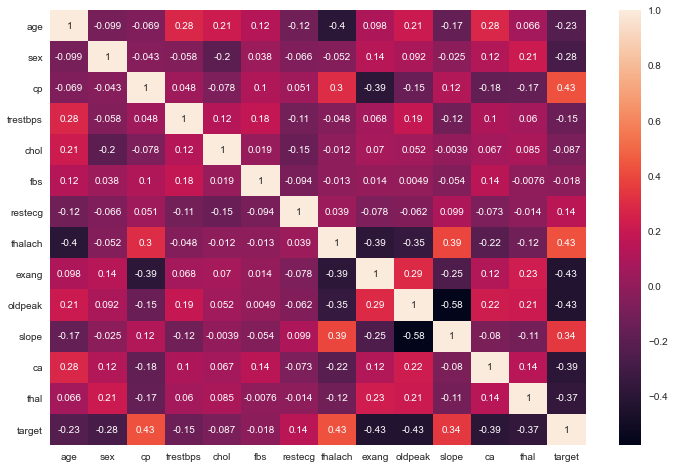

In [146]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot = True);

Even though we don't have any strong correlation between target and the other columns we can say that cp,thalach,exang,oldpeak columns are corralated with the target column

I would like to explore each column one by one.

### Age

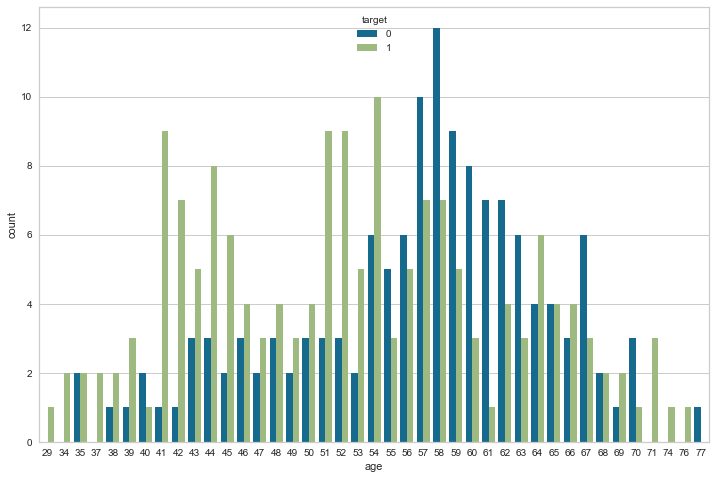

In [147]:
plt.figure(figsize=(12, 8))
sns.countplot(x = df1.age, hue = df1.target);

- Well, tbh I was expecting a strong corralation between age and target column, wlike by age increases narrowing will increase too.
- Only with medical results it is kind of hard do make a comment though but I really would love to see BMI and smoking condition.

- The thing took my attention here is when we have a look at the ratio of having narrowing over %50 is the most between age of 41-55 which made me think stress would be another affect on these age interval.

### Sex

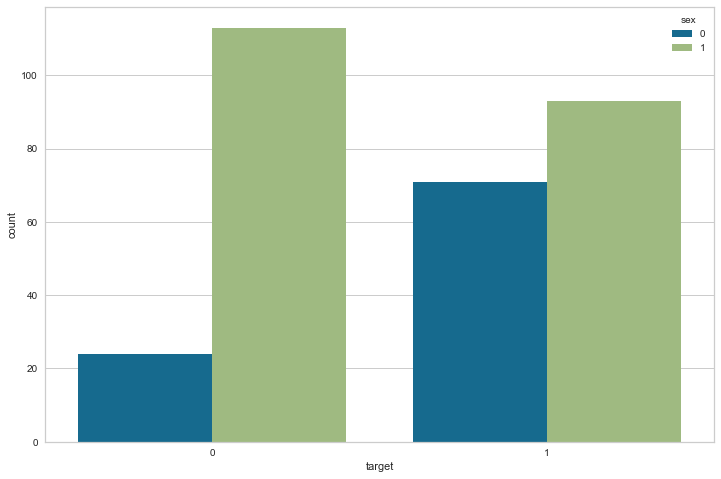

In [148]:
plt.figure(figsize=(12, 8))
sns.countplot(df1.target, hue = df1.sex);

There is nothing surprising here, as many studies demonstrate men's having heart disease is higher than women's.

### cp

This column demostrates chest pain type.

In [149]:
df1.cp.value_counts()

0    142
2     86
1     50
3     23
Name: cp, dtype: int64

I would like to see in which pain type we are having heart disease.

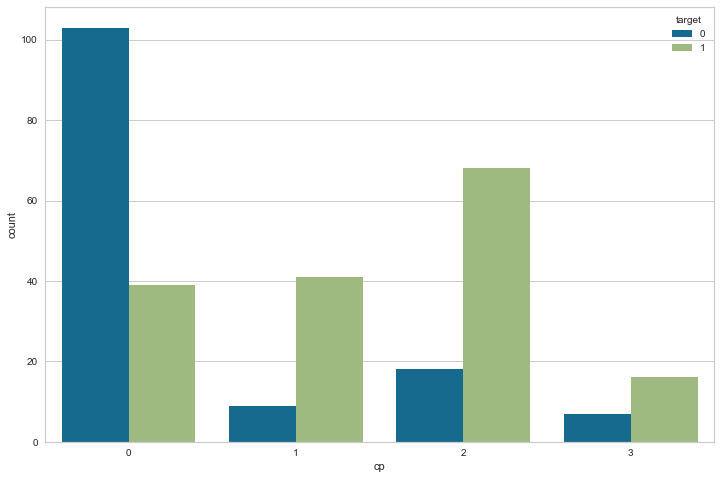

In [150]:
plt.figure(figsize=(12, 8))
sns.countplot(df1.cp, hue = df1.target);

Here we can clearly see that most of the patients have pain type 1 or 2 are having heart disease.

In [151]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### trestbps

This columns shows resting blood pressure.
- I assume that this is systolic blood pressure and over 120 or 130 can be thought as high.

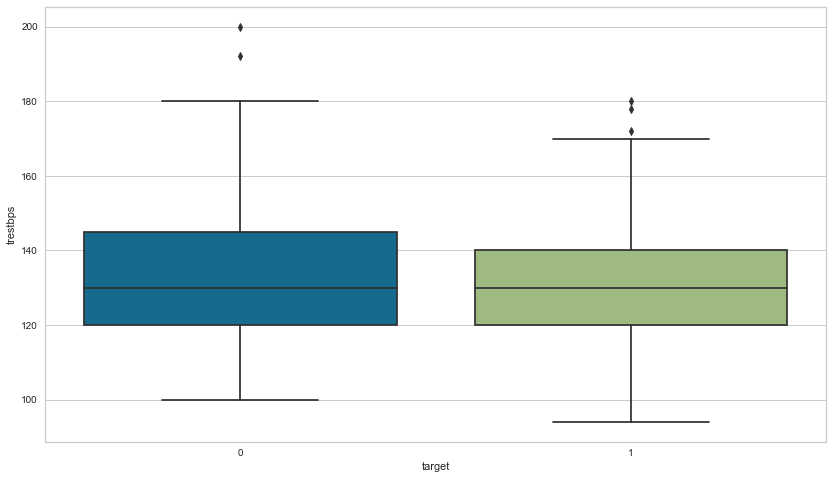

In [152]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df1.target, y = df1.trestbps);

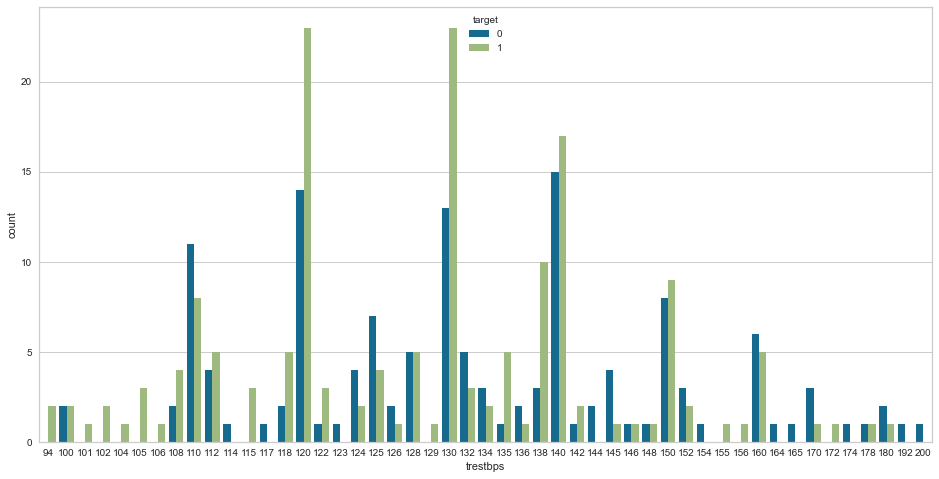

In [153]:
plt.figure(figsize=(16, 8))
sns.countplot(df1.trestbps, hue = df1.target);

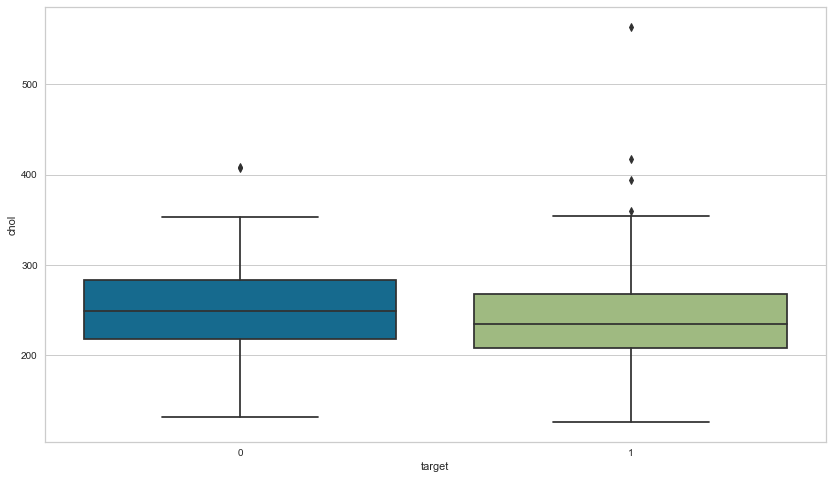

In [154]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df1.target, y = df1.chol);

<br>

### Thalach

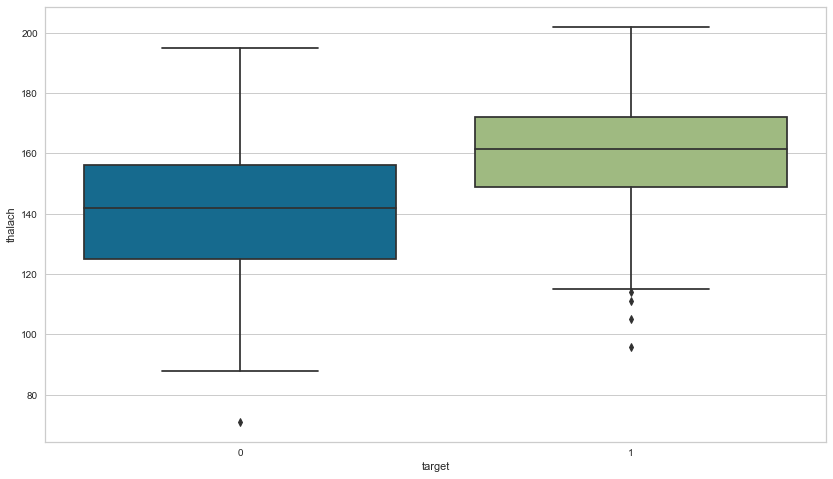

In [155]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df1.target, y = df1.thalach);

### exang

*exercise induced angina (1 = yes; 0 = no)

In [156]:
df1.exang.value_counts()

0    203
1     98
Name: exang, dtype: int64

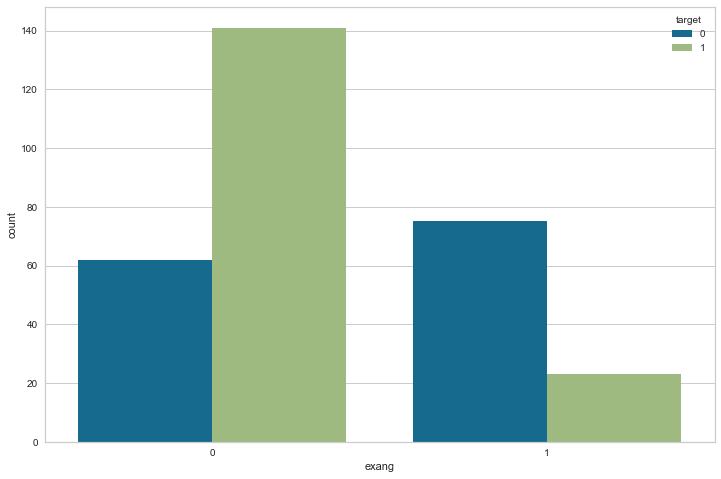

In [157]:
plt.figure(figsize=(12, 8))
sns.countplot(df1.exang, hue = df1.target);

In [158]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<br>

## Train - Test Split

In [190]:
X = df1.drop('target', axis = 1)

In [191]:
y = df1.target

In [192]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [193]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 300, dtype: int64

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
scaler = MinMaxScaler()

In [196]:
X_train_scaled = scaler.fit_transform(X_train)

In [197]:
X_test_scaled = scaler.transform(X_test)

<br>

## Implement kNN

In [198]:
knn = KNeighborsClassifier(n_neighbors=1)

In [199]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [200]:
knn_pred = knn.predict(X_test_scaled)

In [201]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.78      0.82        51

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90



In [202]:
%matplotlib inline

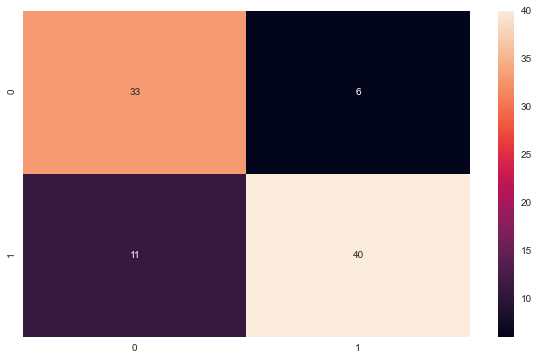

In [203]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True);

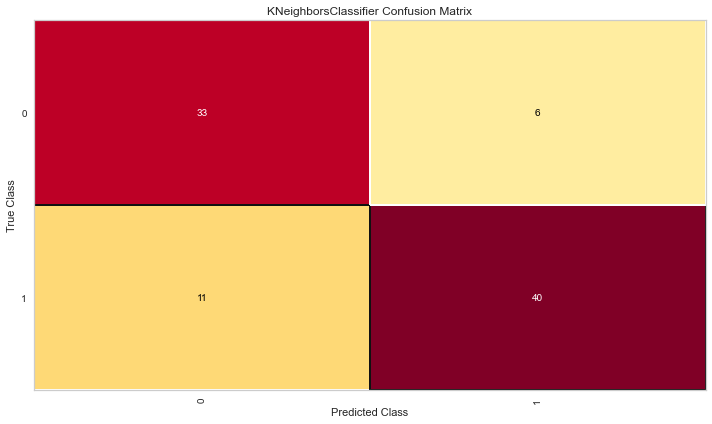

In [204]:
plt.figure(figsize=(10, 6))
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [205]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(1 - recall_score(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

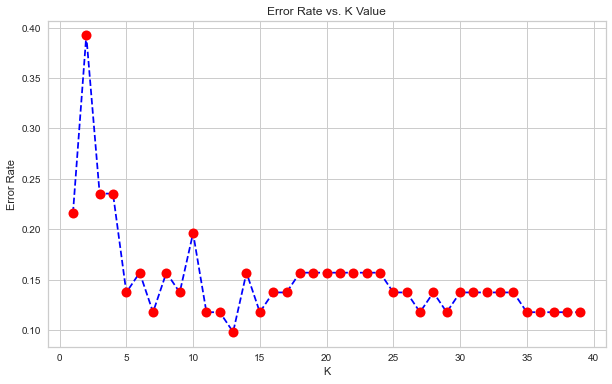

In [206]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [207]:
knn = KNeighborsClassifier(n_neighbors=13)

In [208]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [209]:
knn_pred = knn.predict(X_test_scaled)

In [210]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.84      0.90      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



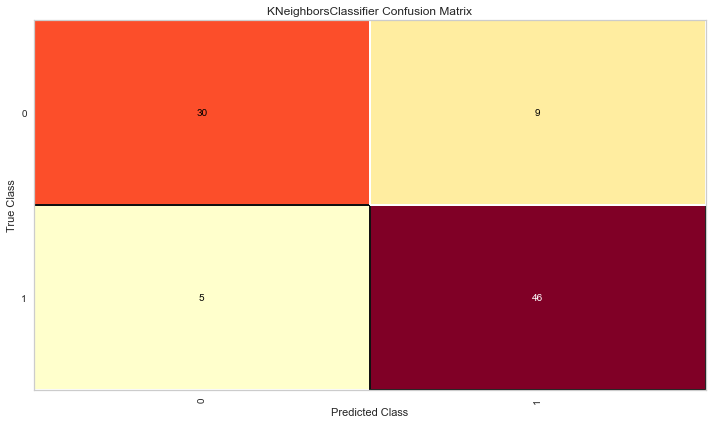

In [212]:
plt.figure(figsize=(10, 6))

cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [214]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=13), X_train_scaled, y_train, cv=10, n_jobs=-1, scoring=['recall'])

In [215]:
pd.DataFrame(scores)

,fit_time,score_time,test_recall
0,0.001019,0.001974,0.727273
1,0.001019,0.001974,0.727273
2,0.000998,0.003990,1.000000
3,0.001994,0.003990,0.818182
4,0.001995,0.003989,0.818182
5,0.001995,0.002992,0.818182
6,0.000997,0.002992,0.909091
7,0.000998,0.002991,0.909091
8,0.001995,0.002992,0.666667
9,0.001994,0.001995,0.916667


In [216]:
pd.DataFrame(scores)['test_recall'].mean()

0.831060606060606

In [217]:
grid_params = {'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1, 2], 'leaf_size': [20, 25, 30, 35, 40, 45],
              'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 17], 'metric': ['minkowski', 'manhattan', 'euclidean']}

In [218]:
cv = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid=grid_params, n_jobs=-1, verbose=1, scoring='recall')

In [219]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40, 45],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15,
                                         17],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [220]:
cv.best_score_

0.883399209486166

In [221]:
cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

In [222]:
knn_pred = cv.predict(X_test_scaled)

In [223]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        39
           1       0.85      0.90      0.88        51

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



In [224]:
knn = KNeighborsClassifier(leaf_size=20, p=1, weights='distance', n_neighbors=15)

In [225]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=15, p=1, weights='distance')

In [226]:
knn_pred = knn.predict(X_test_scaled)

In [227]:
scores = cross_val_score(knn, X_train_scaled, y_train, scoring='recall', cv=10, n_jobs=-1)

In [228]:
pd.DataFrame(scores).mean()

0    0.875758
dtype: float64

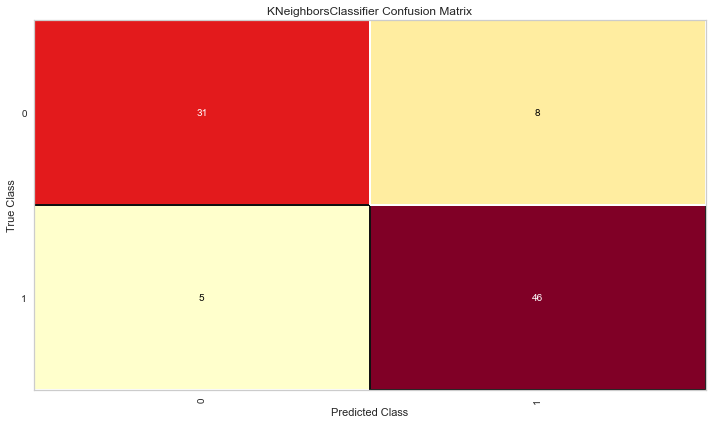

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [229]:
plt.figure(figsize=(10, 6))
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [230]:
knn_recall = recall_score(y_test, knn_pred)

In [231]:
knn_recall

0.9019607843137255

<br>

## Logistic Regression

In [233]:
log_model = LogisticRegression(n_jobs=-1)

In [236]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(n_jobs=-1)

In [238]:
log_pred = log_model.predict(X_test_scaled)

In [239]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.86      0.86      0.86        51

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



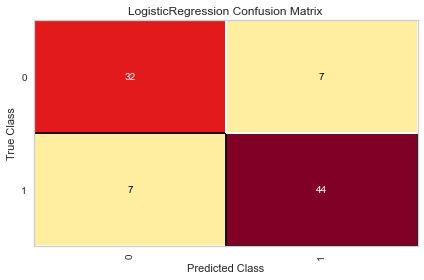

In [240]:
cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [241]:
scores = cross_validate(log_model, X_train_scaled, y_train, scoring='recall', cv=10, n_jobs=-1)

In [242]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.013964,0.001995,0.818182
1,0.013963,0.001995,0.909091
2,0.013963,0.001995,1.000000
3,0.015958,0.001996,0.818182
4,0.016957,0.001993,0.909091
5,0.016957,0.001993,0.636364
6,0.018951,0.001028,1.000000
7,0.015957,0.000997,0.909091
8,0.014960,0.000997,0.666667
9,0.013964,0.001993,0.916667


In [243]:
pd.DataFrame(scores)['test_score'].mean()

0.8583333333333334

In [244]:
log_recall = recall_score(y_test, log_pred)

In [245]:
log_recall

0.8627450980392157

<br>

## SV Classifier

In [246]:
sv_model = SVC()

In [247]:
sv_model.fit(X_train_scaled, y_train)

SVC()

In [248]:
sv_pred = sv_model.predict(X_test_scaled)

In [249]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.92      0.92      0.92        51

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



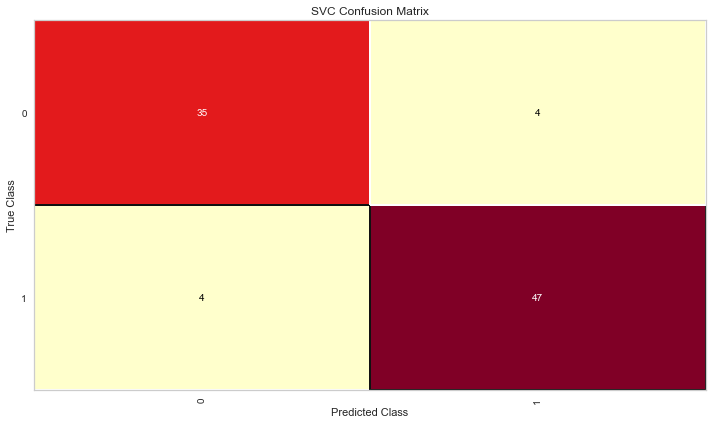

In [251]:
plt.figure(figsize=(10, 6))
cm = ConfusionMatrix(sv_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [252]:
scores = cross_validate(sv_model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='recall')

In [253]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.001968,0.001995,0.636364
1,0.001968,0.001995,0.818182
2,0.001994,0.001996,0.909091
3,0.001994,0.001996,0.818182
4,0.002993,0.001997,0.909091
5,0.002993,0.001997,0.545455
6,0.002993,0.000997,0.909091
7,0.002992,0.001000,0.909091
8,0.001994,0.001998,0.916667
9,0.002995,0.000998,0.916667


In [254]:
pd.DataFrame(scores)['test_score'].mean()

0.8287878787878789

In [255]:
grid_param = {'C':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [1, 2, 3, 4],
             'gamma':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 'scale', 'auto'],
             'random_state':[42]}

In [256]:
cv = GridSearchCV(SVC(random_state=42), param_grid=grid_param, n_jobs=-1, scoring='recall')

In [257]:
cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3,
                                   'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42]},
             scoring='recall')

In [258]:
cv.best_score_

1.0

__There you go!__

In [259]:
cv.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

In [260]:
cv.best_estimator_

SVC(C=0.1, degree=1, gamma=0.1, kernel='poly', random_state=42)

In [261]:
sv_pred = cv.predict(X_test_scaled)

In [262]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        39
           1       0.63      1.00      0.77        51

    accuracy                           0.67        90
   macro avg       0.81      0.62      0.57        90
weighted avg       0.79      0.67      0.60        90



In [265]:
svc_tuned = SVC(C=0.1, degree=1, gamma=0.1, kernel='poly', random_state=42)

In [266]:
scores = cross_validate(svc_tuned, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='recall')

In [267]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.002992,0.001995,1.0
1,0.001995,0.001995,1.0
2,0.001995,0.001995,1.0
3,0.001995,0.001995,1.0
4,0.002992,0.001995,1.0
5,0.002992,0.000997,1.0
6,0.002992,0.000997,1.0
7,0.002992,0.000998,1.0
8,0.002992,0.000996,1.0
9,0.002992,0.000996,1.0


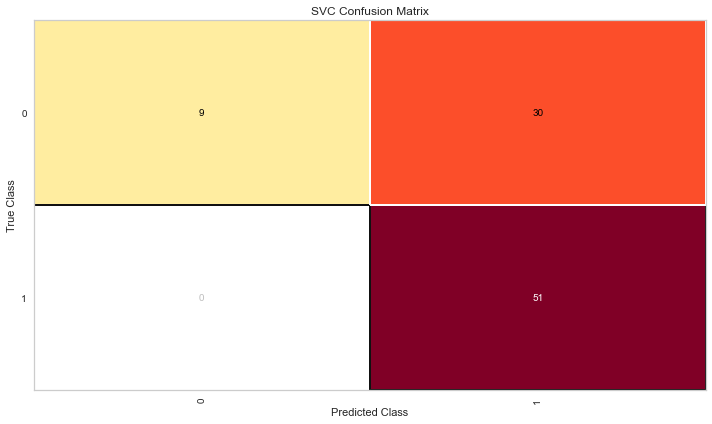

In [269]:
plt.figure(figsize=(10, 6))
cm = ConfusionMatrix(svc_tuned)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [271]:
sv_recall = recall_score(y_test, sv_pred)

In [272]:
sv_recall

1.0

<br>

## Visually Compare Model Scores

In [273]:
plt.figure(figsize=(10, 6))

rec_df = pd.DataFrame({'knn_recall_score': knn_recall,
              'support_vector_recall_score': sv_recall,
              'log_reg_recall_score': log_recall}, index=[0])

<Figure size 720x432 with 0 Axes>

In [274]:
rec_df

,knn_recall_score,support_vector_recall_score,log_reg_recall_score
0,0.901961,1.0,0.862745


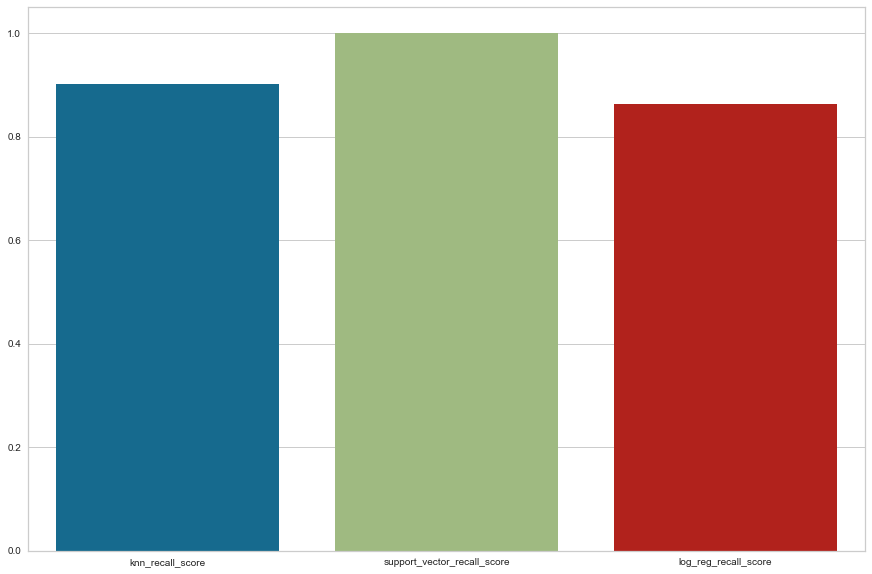

In [275]:
plt.figure(figsize=(15, 10))
sns.barplot(x=rec_df.columns, y=rec_df.iloc[0].values);

<br>

All done here ! I hope you like this notebook! 

___